<a href="https://colab.research.google.com/github/Sidneyp91/ml_classes/blob/main/Core_Learning_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q sklearn

  Preparing metadata (setup.py) ... done


In [4]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

   survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]


<Axes: >

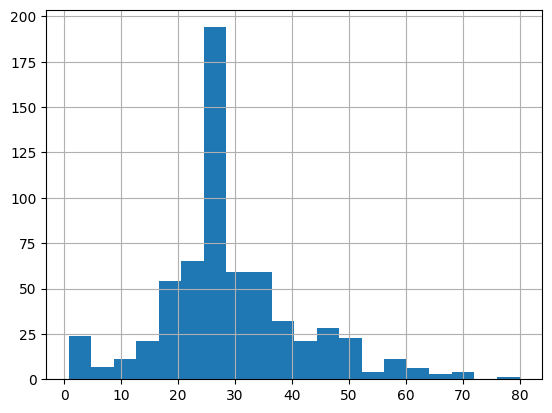

In [ ]:
dftrain.age.hist(bins=20)

Text(0.5, 0, '%survive')

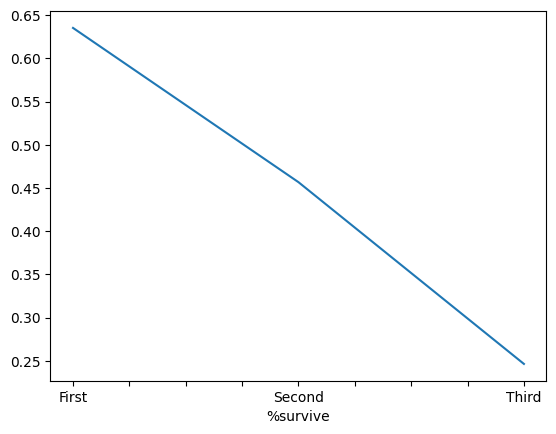

In [ ]:
#percentage survival by class 
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='line').set_xlabel('%survive')

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=15, shuffle=True, batch_size=32):
  def input_func():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_func


train_input_fn = make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

print(result);


{'accuracy': 0.75757575, 'accuracy_baseline': 0.625, 'auc': 0.82852775, 'auc_precision_recall': 0.7596774, 'average_loss': 0.4977402, 'label/mean': 0.375, 'loss': 0.49005616, 'precision': 0.65217394, 'prediction/mean': 0.40844524, 'recall': 0.75757575, 'global_step': 300}


In [ ]:
result = list(linear_est.predict(eval_input_fn))

print(dfeval.loc[5])

print(result[5]['probabilities'])

sex                       female
age                         15.0
n_siblings_spouses             0
parch                          0
fare                      8.0292
class                      Third
deck                     unknown
embark_town           Queenstown
alone                          y
Name: 5, dtype: object
[0.25355065 0.74644935]


CLASSIFICATION


In [1]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa','Versicolor','Virginica']



In [4]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)





573/573 [==============================] - 0s 0us/step


In [7]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() 

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [5]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [13]:
def input_fn(features,labels, training=True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)



feature_columns = []
for key in train.keys():
  feature_columns.append(tf.feature_column.numeric_column(key=key))


#buiding the model
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units =[30,10],
    n_classes=3
)

classifier.train(
    input_fn = lambda: input_fn(train, train_y, training=True),
    steps=5000
)

classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))

Instructions for updating:
Use tf.keras instead.


{'accuracy': 0.8666667,
 'average_loss': 0.46588758,
 'loss': 0.46588758,
 'global_step': 5000}

In [15]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid: 
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))


Please type numeric values as prompted.
SepalLength: 2


KeyboardInterrupt: ignored

HIDDEN MARKOV MODELS


In [4]:
!pip install tensorflow_probability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow_probability as tfp
import tensorflow as tf



# tfd = tfp.distributions  # making a shortcut for later on
# initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
# transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
#                                                  [0.2, 0.8]])  # refer to points 3 and 4 above
# observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])

# model = tfd.HiddenMarkovModel(
#     initial_distribution=initial_distribution,
#     transition_distribution=transition_distribution,
#     observation_distribution=observation_distribution,
#     num_steps=7)



ImportError: ignored